In [10]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Capstone

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Capstone


In [11]:
!pip install plotly==5.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 10.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [17]:
import pandas as pd
import plotly.graph_objects as go

adm_df = pd.read_csv('Admission_ForXGB.csv')
los_df = pd.read_csv('LengthOfStay_ForXGB.csv')
exp_df = pd.read_csv('MORTALITY_EDSTAYS_TRIAGE_LASTVITALS.csv')

In [59]:
# sankey for arrival and admission

adm_df.loc[adm_df.disposition=='TRANSFER', 'disposition'] = 'ADMITTED'

at_n = adm_df.arrival_transport.value_counts().reset_index()
at_n.columns = ['arrival_transport', 'total']
adm_sank = adm_df[['arrival_transport', 'disposition']].value_counts().reset_index().sort_values(['arrival_transport', 'disposition'])
adm_sank.columns = ['arrival_transport', 'disposition', 'n']
adm_sank = pd.merge(adm_sank, at_n)
adm_sank['pp'] = adm_sank.n / adm_sank.total

values_ = adm_sank.pp

from IPython.display import display, HTML

print("Dataframe 1:")
display(adm_sank)


fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['AMBULANCE', 'HELICOPTER', 'OTHER','UNKNOWN','WALK IN', 'ADMITTED','HOME'],
      color = "#bb1213"
    ),
    link = dict(
      source = [0,0,1,1,2,2,3,3,4,4], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [5,6,5,6,5,6,5,6,5,6],
      value = values_
  ))])


fig.update_layout(title_text="Arrival Method to Disposition", font_size=16)
fig.show()


Dataframe 1:


,arrival_transport,disposition,n,total,pp
0,AMBULANCE,ADMITTED,90959,159294,0.571013
1,AMBULANCE,HOME,68335,159294,0.428987
2,HELICOPTER,ADMITTED,805,853,0.943728
3,HELICOPTER,HOME,48,853,0.056272
4,OTHER,ADMITTED,474,1330,0.356391
5,OTHER,HOME,856,1330,0.643609
6,UNKNOWN,ADMITTED,6974,8158,0.854866
7,UNKNOWN,HOME,1184,8158,0.145134
8,WALK IN,ADMITTED,74527,258649,0.288140
9,WALK IN,HOME,184122,258649,0.711860


<Figure size 960x480 with 0 Axes>

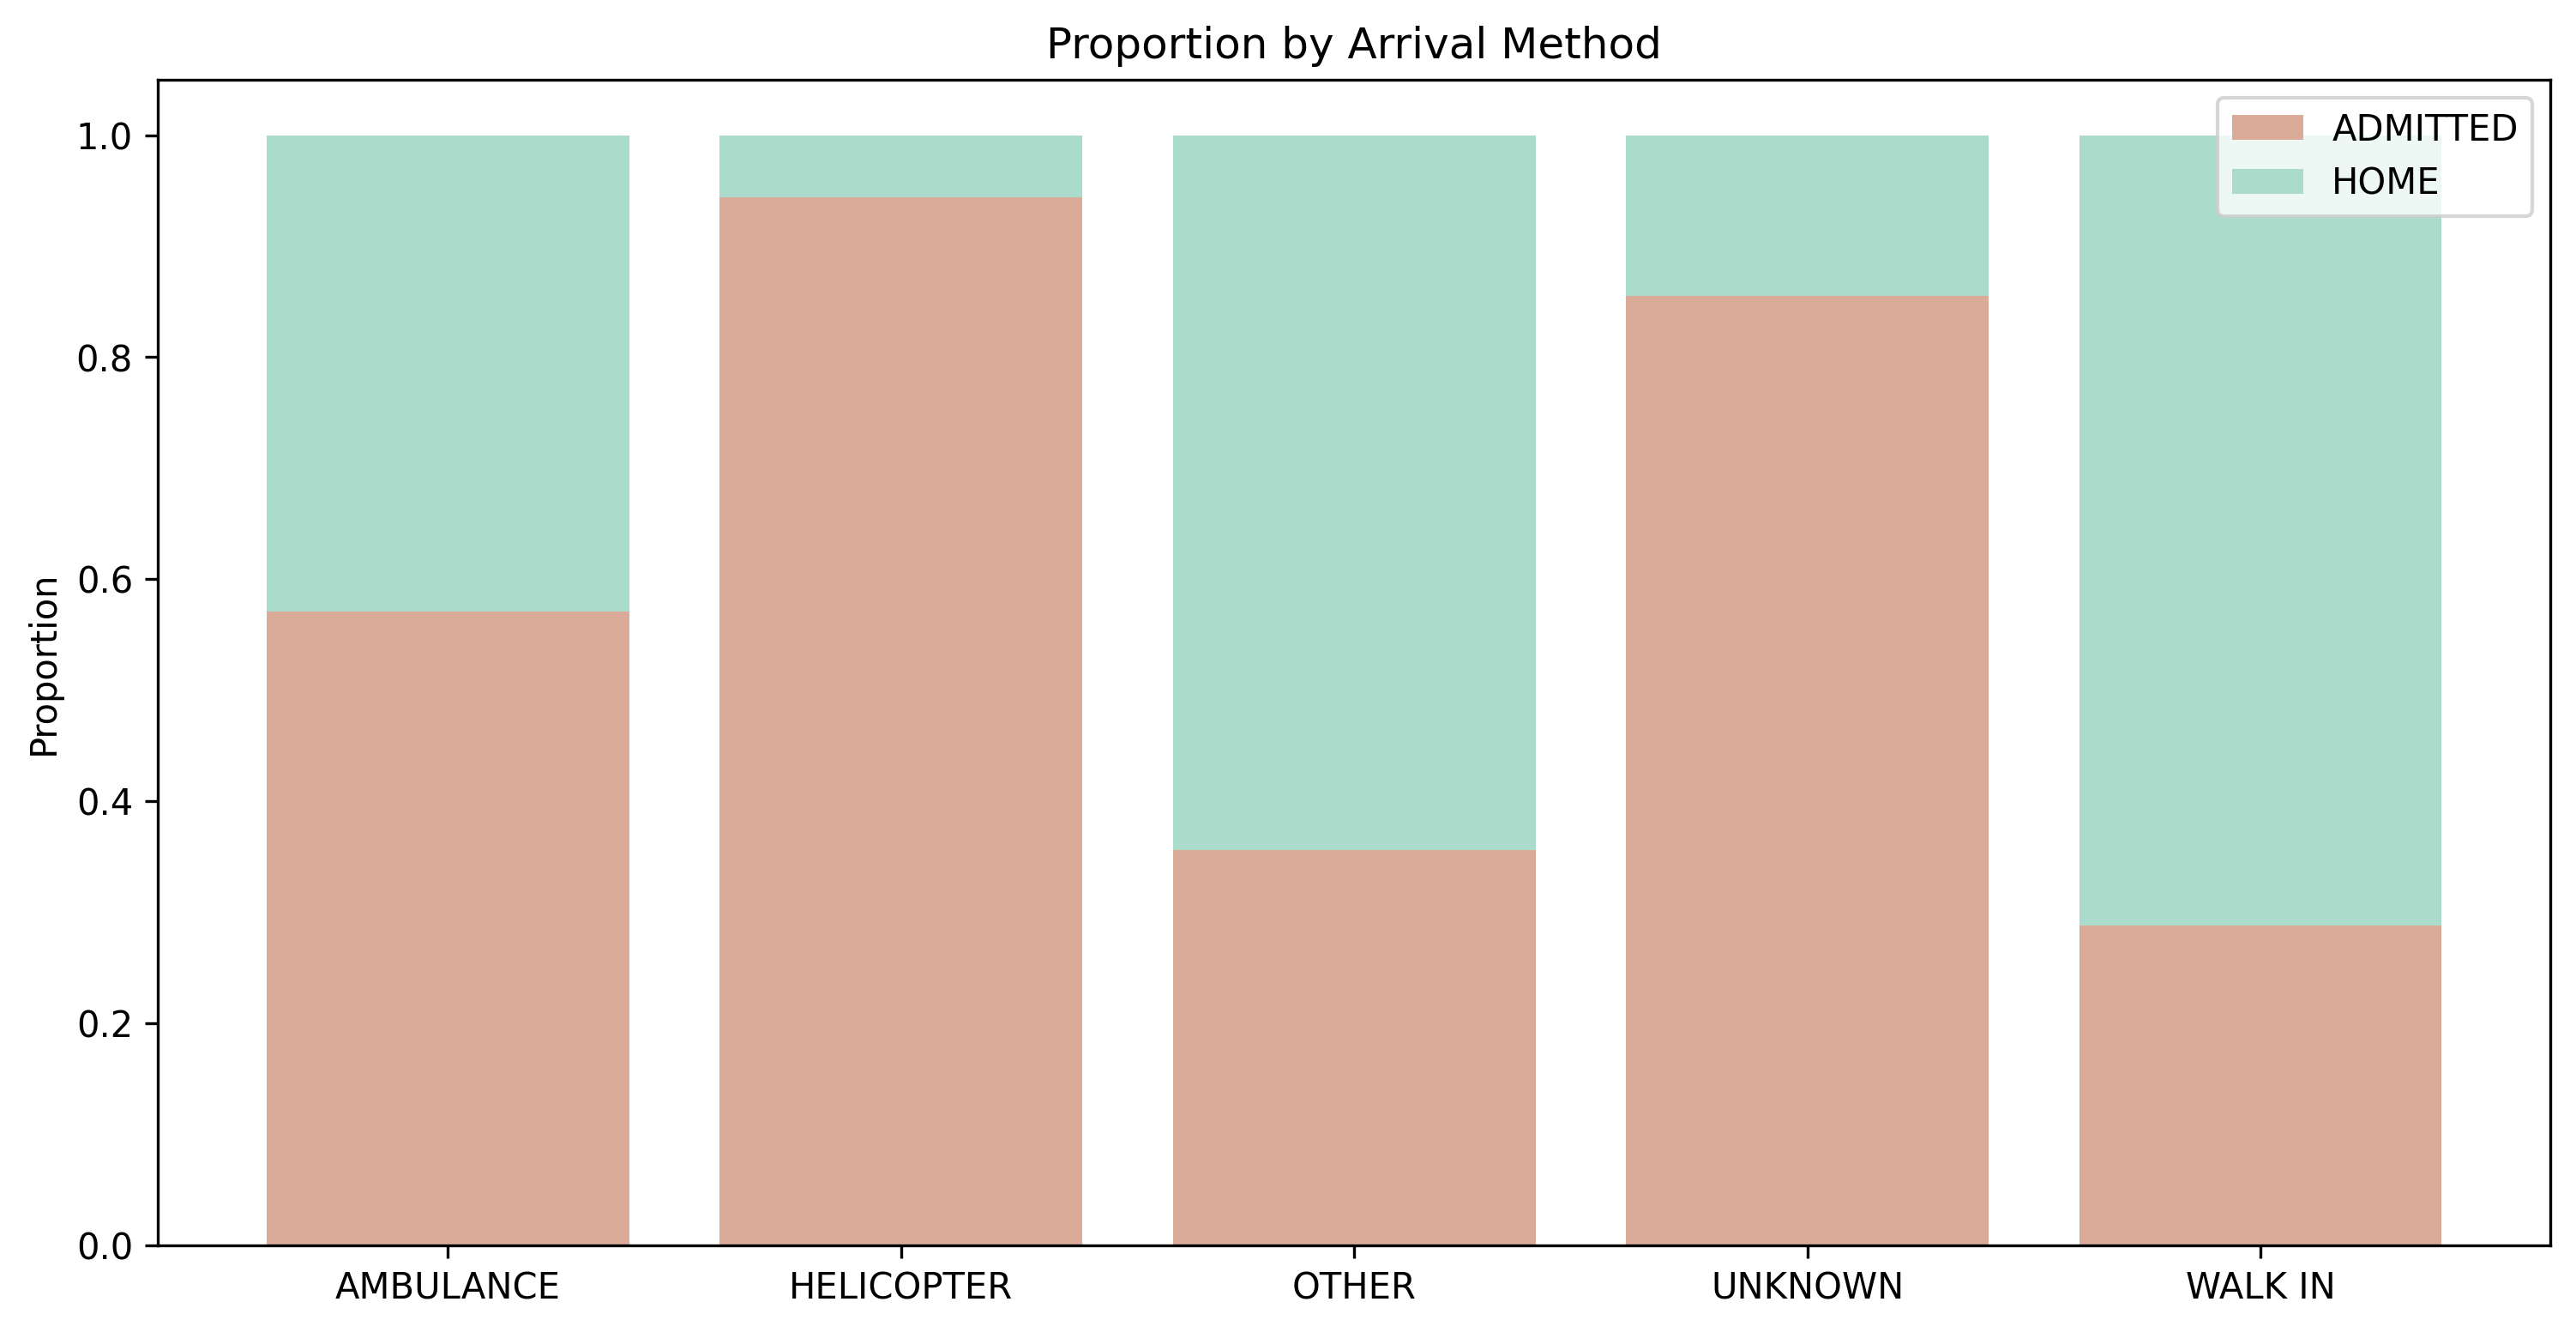

In [74]:
import matplotlib.pyplot as plt

labels = list(adm_sank.arrival_transport.unique())
admis_values = adm_sank[adm_sank.disposition=='ADMITTED']['pp']
home_values = adm_sank[adm_sank.disposition=='HOME']['pp']

from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)

# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
# men_means = [20, 35, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]
# men_std = [2, 3, 4, 1, 2]
# women_std = [3, 5, 2, 3, 3]
width = 0.8       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

ax.bar(labels, admis_values, width, label='ADMITTED', color='#dbab9a')
ax.bar(labels, home_values, width,bottom=admis_values, label='HOME', color = '#aadbcb')

ax.set_ylabel('Proportion')
ax.set_title('Proportion by Arrival Method')
ax.legend()

plt.show()

In [35]:
# sankey for arrival and length of stay


In [28]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)

In [34]:
data['data'][0]['node']['label']

["Agricultural 'waste'",
 'Bio-conversion',
 'Liquid',
 'Losses',
 'Solid',
 'Gas',
 'Biofuel imports',
 'Biomass imports',
 'Coal imports',
 'Coal',
 'Coal reserves',
 'District heating',
 'Industry',
 'Heating and cooling - commercial',
 'Heating and cooling - homes',
 'Electricity grid',
 'Over generation / exports',
 'H2 conversion',
 'Road transport',
 'Agriculture',
 'Rail transport',
 'Lighting & appliances - commercial',
 'Lighting & appliances - homes',
 'Gas imports',
 'Ngas',
 'Gas reserves',
 'Thermal generation',
 'Geothermal',
 'H2',
 'Hydro',
 'International shipping',
 'Domestic aviation',
 'International aviation',
 'National navigation',
 'Marine algae',
 'Nuclear',
 'Oil imports',
 'Oil',
 'Oil reserves',
 'Other waste',
 'Pumped heat',
 'Solar PV',
 'Solar Thermal',
 'Solar',
 'Tidal',
 'UK land based bioenergy',
 'Wave',
 'Wind']